In [1]:
# DATA PREPA
import pandas as pd

# VIZUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
from textblob import TextBlob

# Loading the data from .csv (after preparing it in Excel)

In [2]:
data = pd.read_csv('../raw_data/data.csv',sep=";")
data.head(2)

,User,Module,Step,Question,Answer,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the data

## Removing empty columns

After loading the data that was exported from Excel, it created few ; at the end of each line. And it resulted in having empty columns. So let's remove them.

In [3]:
data = data.loc[:,'User':'Answer']
print(f'Shape of data: {data.shape}')
print(f'The number of all participants: {data.User.nunique()}')

Shape of data: (2779, 5)
The number of all participants: 70


In [4]:
data.head(2)

,User,Module,Step,Question,Answer
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my..."
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,..."


## Removing empty rows

Within the Excel file there were empty rows after each participant. We removed the rows that were empty in 'User' column. There were 200 rows like that.

In [5]:
print(f'Number of empty rows to remove: {data.User.isnull().sum()}')

Number of empty rows to remove: 200


In [6]:
data = data.dropna(subset=['User'])
data.shape

(2579, 5)

## Removing duplicates

We checked if (by accident) there are some duplicated question-answer pair. And we found 15 rows like that, we also removed them.

In [7]:
print(f'Number of duplicated rows: {data.duplicated().sum()}')

Number of duplicated rows: 15


In [8]:
print(f'Looking at duplicated rows:')
display(data[data.duplicated()])

Looking at duplicated rows:


,User,Module,Step,Question,Answer
2547,CD Female (30s) South Africa,Module_4,Step_11,What is the story you are telling yourself abo...,"The story I am telling, or at least my perspec..."
2548,CD Female (30s) South Africa,Module_4,Step_11,What changes when you invite curiosity and “I ...,"I immediately go from an immovable, debilitati..."
2549,CD Female (30s) South Africa,Module_4,Step_11,What else is there to discover when you invite...,New perspectives. A way forward. Solutions. An...
2550,CD Female (30s) South Africa,Module_4,Step_11,Consider a relationship in your life that woul...,I would start by simply asking more questions....
2551,CD Female (30s) South Africa,Module_4,Step_13,"Reflecting on what you’ve observed so far, wha...","Sjoe, one of the most consistent and persuasiv..."
2552,CD Female (30s) South Africa,Module_4,Step_13,What is the impact of this on your life?,"Believing this story has slowed me down, it ha..."
2553,CD Female (30s) South Africa,Module_4,Step_13,Now it’s time to rewrite this story. How does ...,"So my negative thoughts/voice often say ""You w..."
2554,CD Female (30s) South Africa,Module_4,Step_13,What is possible for you if you go into the wo...,Opportunities for growth and opportunities to ...
2555,CD Female (30s) South Africa,Module_4,Step_13,What was this experience like for you?,Oddly reassuring. I really hope I remember to ...
2556,CD Female (30s) South Africa,Module_4,Step_13,What are you learning about the power of refra...,Reframing is essential to navigating through l...


Looks like for one participant Module 4 info was copied twice! Let's remove it!

In [9]:
data = data.drop_duplicates()
data.shape

(2564, 5)

## Adding count of words per answer

We created a function to count words in each answer and we use it to engineer new column 'Answer_lenght'.

In [10]:
def count_words_in_answer(answer):
    if type(answer) == str:
        result = len(list(str(answer).split(" ")))
    else:
        result = 0
    return result

# Adding a new column with the length of each answer
data['Answer_length'] = data['Answer'].apply(lambda x: count_words_in_answer(x))
data.head(3)

,User,Module,Step,Question,Answer,Answer_length
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",16
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",29
2,MP - Female 36 UK,Module_1,Step_2,In what ways would you like to be showing up d...,More relaxed,2


Let's plot the distribution of length of all the answers:

<AxesSubplot:xlabel='Answer_length', ylabel='Count'>

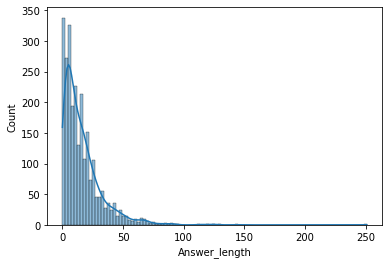

In [11]:
sns.histplot(data['Answer_length'], kde=True)

## Removing NaN answers

We checked if all answers are not missing. And we discovered that there are 2 missing answers so we removed them.

In [12]:
print(f'Number of Nan values insead of answer: {data.Answer.isnull().sum()}')

Number of Nan values insead of answer: 2


In [13]:
data[data.Answer.isnull()]

,User,Module,Step,Question,Answer,Answer_length
650,SM Female (30s) South Africa,Module_1,Step_2,How do you want to remember this?,NaN,0
1836,SM Female (30s) South Africa,Module_2,Step_7,"We love attaching a metaphor, saying, action, ...",NaN,0


In [14]:
data = data.dropna(subset=['Answer'])
data.shape

(2562, 6)

## Examination of short answers (length < 4)

In [15]:
data[data['Answer_length'] == 3].groupby('Answer').count()

,User,Module,Step,Question,Answer_length
Answer,,,,,
"""Agenda, Engage, Assess""",1,1,1,1,1
"""Re-frame your mind""",1,1,1,1,1
"""We are family""",1,1,1,1,1
A balanced scale,1,1,1,1,1
A daily reminder,1,1,1,1,1
...,...,...,...,...,...
relaxation and peace,1,1,1,1,1
settled and calm,1,1,1,1,1
shortness of breath,1,1,1,1,1


In [16]:
data[data['Answer_length'] < 2].Answer.unique()

array(['Freedom', 'Calming', 'Integrity', 'Signposts', 'Courage',
       'Equity', 'crates', 'Mantra', 'Happiness', 'People', 'Family',
       'good.', 'calming', 'Triangle', 'Relaxing', 'Mantra..', 'Loyalty',
       'trust', 'cool', 'Progress.', 'Balance', 'Calm', 'mantra',
       'refreshing!', 'connection', 'Exercise', 'curious', 'Grounding',
       'Hugs', 'Generosity', 'Compassion', 'Curiosity', 'Authenticity',
       'Excellence', 'good', 'authenticity', 'curiosity', 'Fitness',
       'Well-being', 'x', 'Relazing.', 'Patience', '-', 'Evolution.',
       'freedom', 'realness', 'relaxing', 'travel', 'integrity',
       'Responsibility', 'Contentment', 'centring', 'leadership',
       'Knowledge', 'Books', 'Respect', 'Soothing.', 'euphoric',
       'Stressful!', 'Fantastic!', 'Lethargic', 'Sad', 'Buzzing', 'Good',
       'Darkness', 'Tension', 'Frustrating', 'Energising', 'unpleasant',
       'wonderful', 'Sure', 'Peaceful', 'exhausting', 'discovery', 'calm',
       'Darkness/Fog', 

# Exploring the data

To explore data fro each participant, we created a function to extract information per user.

In [17]:
def user_answered_questions(users_name):
    user_answered_questions = data.loc[data['User'] ==  users_name]
    user_answered_questions = user_answered_questions.reset_index()
    return user_answered_questions

## exploring first participant

In [18]:
# The answers of the "first" person
first_person = user_answered_questions('MP - Female 36 UK')
print(f'Number of missing values for first participant:')
display(first_person.isnull().sum())
display(first_person.head())
first_person=first_person.reset_index()
print(f'Shape of data for first participant: {first_person.shape}')

Number of missing values for first participant:


index            0
User             0
Module           0
Step             0
Question         0
Answer           0
Answer_length    0
dtype: int64

,index,User,Module,Step,Question,Answer,Answer_length
0,0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",16
1,1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",29
2,2,MP - Female 36 UK,Module_1,Step_2,In what ways would you like to be showing up d...,More relaxed,2
3,3,MP - Female 36 UK,Module_1,Step_2,Why is this important to you?,Just be confident in my skills and that I'll b...,20
4,4,MP - Female 36 UK,Module_1,Step_2,What’s one small action you can take right now...,"If worry creeps in, take a step back, thinking...",10


Shape of data for first participant: (68, 8)


68 answers, from the given information about the data is should be 56 questions... So let's have a look ate the questions and examine if there are some weird ones...?

In [19]:
print(f'Printing all questions to see if there arent some weird ones')
for i in range(68):
    print(first_person['Question'][i])

Printing all questions to see if there arent some weird ones
What are you excited about as you begin your Leadership-Program experience?
In what ways do you feel you are currently showing up as a leader in your everyday life?
In what ways would you like to be showing up differently as a leader in your everyday life?
Why is this important to you?
What’s one small action you can take right now to move towards this?
How do you want to remember this?
What was that experience like for you?
What are you noticing about conscious breathing?
What has to be part of the way you live your life for you to be who you are?
Identify one of your top values, and let us know why this value is important to you
When you think of this value, what image or visual comes to mind?
Identify another top value of yours, and let us know why this value is important to you
When you think of this value, what sound, song or music comes to mind?
Identify another top value of yours, and let us know why this value is impo

Plotting length for each anwser


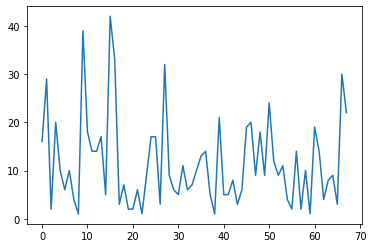

In [20]:
print(f'Plotting length for each anwser')
plt.plot(first_person['Answer_length']);

## exploring second participant

Number of missing values for first participant:


(15, 7)

index            0
User             0
Module           0
Step             0
Question         0
Answer           0
Answer_length    0
dtype: int64

Number of anwsers: (15, 7)
Plotting length for each anwser


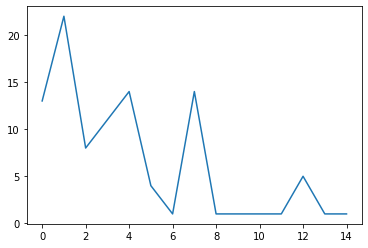

In [21]:
second_person = user_answered_questions('KB - Female (30s) CAN')
print(f'Number of missing values for first participant:')
display(second_person.shape)
display(second_person.isnull().sum())
print(f'Number of anwsers: {second_person.shape}')
# The lenght of the answers of the second person as a function of curse duration
second_person = second_person.reset_index()
print(f'Plotting length for each anwser')
plt.plot(second_person['Answer_length']);

## checking for pattern in lenght of answers

Let's check if there is a clear pattern for length of answers.

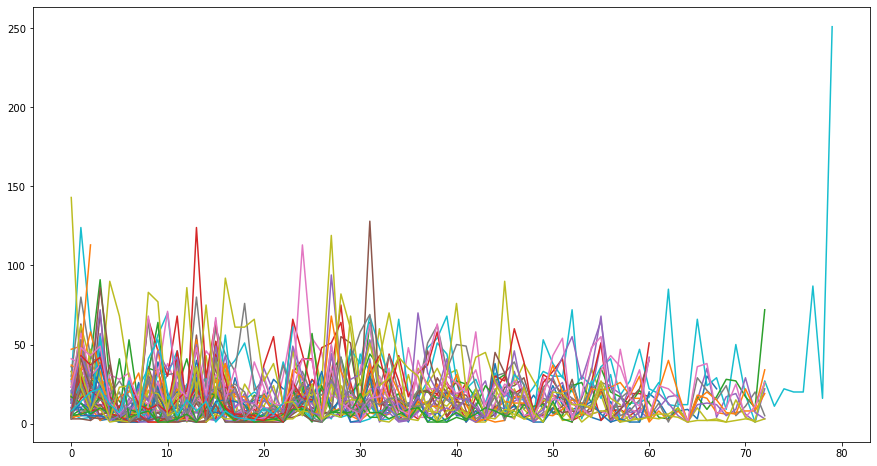

In [22]:
# List of all the participants
users_list = data.User.unique()

plt.figure(figsize=(15,8))
for i in users_list:
    plt.plot(user_answered_questions(i)['Answer_length'])

No clear pattern visible :) 

# Exploring only the first module

## Running the first sentiment analysis on uncleaned data

In [23]:
data.head(10)

,User,Module,Step,Question,Answer,Answer_length
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",16
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",29
2,MP - Female 36 UK,Module_1,Step_2,In what ways would you like to be showing up d...,More relaxed,2
3,MP - Female 36 UK,Module_1,Step_2,Why is this important to you?,Just be confident in my skills and that I'll b...,20
4,MP - Female 36 UK,Module_1,Step_2,What’s one small action you can take right now...,"If worry creeps in, take a step back, thinking...",10
5,MP - Female 36 UK,Module_1,Step_2,How do you want to remember this?,Worrying is the thief of joy,6
6,MP - Female 36 UK,Module_1,Step_3,What was that experience like for you?,"I enjoyed it, I find I don't switch off muxh",10
7,MP - Female 36 UK,Module_1,Step_3,What are you noticing about conscious breathing?,Really helps to relax,4
8,MP - Female 36 UK,Module_1,Step_4,What has to be part of the way you live your l...,Freedom,1
9,MP - Female 36 UK,Module_1,Step_4,"Identify one of your top values, and let us kn...","Adaptability, I think it encompasses lots of t...",39


In [24]:
# Filtering the dataset only for the first Module
data_Module_1 = data[data.Module=='Module_1']

In [25]:
# Number of the participants out of 70 who answered in the first module 
data_Module_1.User.nunique()

68

In [26]:
users_list_first_module = data_Module_1.User.unique()

In [27]:
len(users_list_first_module)

68

In [28]:
first_person_all_module = user_answered_questions('MP - Female 36 UK')

In [29]:
first_person_first_module = first_person_all_module[first_person_all_module.Module=='Module_1']

In [30]:
first_person_first_module

,index,User,Module,Step,Question,Answer,Answer_length
0,0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",16
1,1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",29
2,2,MP - Female 36 UK,Module_1,Step_2,In what ways would you like to be showing up d...,More relaxed,2
3,3,MP - Female 36 UK,Module_1,Step_2,Why is this important to you?,Just be confident in my skills and that I'll b...,20
4,4,MP - Female 36 UK,Module_1,Step_2,What’s one small action you can take right now...,"If worry creeps in, take a step back, thinking...",10
5,5,MP - Female 36 UK,Module_1,Step_2,How do you want to remember this?,Worrying is the thief of joy,6
6,6,MP - Female 36 UK,Module_1,Step_3,What was that experience like for you?,"I enjoyed it, I find I don't switch off muxh",10
7,7,MP - Female 36 UK,Module_1,Step_3,What are you noticing about conscious breathing?,Really helps to relax,4
8,8,MP - Female 36 UK,Module_1,Step_4,What has to be part of the way you live your l...,Freedom,1
9,9,MP - Female 36 UK,Module_1,Step_4,"Identify one of your top values, and let us kn...","Adaptability, I think it encompasses lots of t...",39


In [31]:
# Adding all the answer a first person gave in the first module and creating a string out of it
all_answers_testing = ""
for i in range(len(first_person_first_module)):
    all_answers_testing = all_answers_testing + first_person_first_module.Answer[i]

In [32]:
#all_answers_testing

In [33]:
# A list of all the answers of all participants in the first module
all_user_all_answers = []
for name in users_list_first_module:
    
    all_answers = ""
    for i in range(len(user_answered_questions(name)[user_answered_questions(name).Module=='Module_1'])):
        all_answers = all_answers + user_answered_questions(name)[user_answered_questions(name).Module=='Module_1'].Answer[i]
    all_user_all_answers.append(all_answers)

In [34]:
# A list of all the answers of all participants in the first module
len(all_user_all_answers)

68

In [35]:
# Dataframe of the first module of all answers of all participants
data_answers_first_module = pd.DataFrame(all_user_all_answers, users_list_first_module, columns=['Accummulated_answers'])
data_answers_first_module['Accummulated_answers'][0]

"Self development, learning new things about my way of being and how I interact with othersSociable and confidently interact with others, will organise events and meet ups with friends and new colleagues. I am pretty self sufficient and lead myself through life and decisionsMore relaxedJust be confident in my skills and that I'll be able to navigate through, rather than worry about the outcomeIf worry creeps in, take a step back, thinking positivelyWorrying is the thief of joyI enjoyed it, I find I don't switch off muxhReally helps to relaxFreedomAdaptability, I think it encompasses lots of things, adapting to others, situations, environments. It's about recognising that you're not the centre of everything jng but that you're you, your part of lots of things and you adapt to themConfidence, being at peace in a multitude of environments and groups, standing tall and being sure you belongAccountability, taking ownership of choices, not being a victim and making my own opportunitiesNothin

In [36]:
# The text of the first person, just as a first trial
text = data_answers_first_module.Accummulated_answers[0]

In [37]:
# Sentiment in a range of [-1;1] for the first participant:
blob = TextBlob(text)
sentiment = blob.sentiment
sentiment

Sentiment(polarity=0.23787878787878786, subjectivity=0.5842487373737373)

In [38]:
# Sentiment for all the participants in the first module
all_sentiment = []
for i in range(len(data_answers_first_module)):
    text = data_answers_first_module.Accummulated_answers[i]
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    all_sentiment.append(sentiment)

<AxesSubplot:ylabel='Count'>

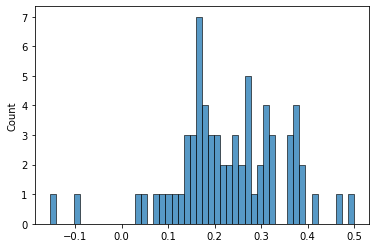

In [39]:
# Distribution of the sentiment of the text of all the participants in the first module
sns.histplot(all_sentiment, bins=50)

## Function etc

In [40]:
users_list_all_q = ['DJ (30s) South Africa', 'CD Female (30s) South Africa',
       'AV Female (40s) CAN', 'SOD Male (38) UK', 'JS Male (30s) South Africa',
       'BM Male (30s) South Africa', 'RA Male (70s) CAN',
       'DV Female (30s) South Africa', 'AG Female (40s) CAN',
       'JP Female (40s) CAN']

In [78]:
len(users_list_all_q)

10

In [41]:
# Function for returning a dataframe with accumulated answers of participants (list )withing a module

def accumulated_answers(user_list, module):
    all_user_all_answers = []
    for name in user_list:
        all_answers = ""
        for i in range(len(user_answered_questions(name)[user_answered_questions(name).Module==module])):
            all_answers = all_answers + " " + user_answered_questions(name)[user_answered_questions(name).Module==module].reset_index().Answer[i]
        all_user_all_answers.append(all_answers)
    df = pd.DataFrame(all_user_all_answers, user_list, columns=['Accummulated_answers'])
    df['Module_name'] = module
    return df

In [42]:
test1 = accumulated_answers(users_list_all_q, 'Module_1')
test2 = accumulated_answers(users_list_all_q, 'Module_2')
test3 = accumulated_answers(users_list_all_q, 'Module_3')
test4 = accumulated_answers(users_list_all_q, 'Module_4')
test5 = accumulated_answers(users_list_all_q, 'Module_5')

In [81]:
test1.Accummulated_answers[0]

' To learn some new skills and gain new insights I can employ in my day to day. I check in with my team members on a regular basis and do my best to communicate clearly and lead by example. I\'d like to be able to motivate my team better I feel like it\'s one thing to lead by example, be a good communicator and make sure your team knows your door is always open, but it\'s another thing to be able to motivate and inspire your team. I do believe that having a leader that can encompass all this helps an employee\'s overall happiness at work. To consciously try be more motivational in our weekly catch up meetings. Team Time Tuesdays Could be a useful technique to employ in stressful situations It allows you to clear your mind as you have to focus on one thing People Achievement, knowledge and teamwork A cross section of a tree Family "We are family" Independence, because it\'s important to be self sufficient Someone flexing a muscle'

## Text cleaning needed, running the sentiment analysis

In [43]:
all_sentiment1 = []
for i in range(len(test1)):
    text = test1.Accummulated_answers[i]
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    all_sentiment1.append(sentiment)

In [44]:
all_sentiment2 = []
for i in range(len(test2)):
    text = test2.Accummulated_answers[i]
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    all_sentiment2.append(sentiment)

In [45]:
all_sentiment3 = []
for i in range(len(test3)):
    text = test3.Accummulated_answers[i]
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    all_sentiment3.append(sentiment)

In [46]:
all_sentiment4 = []
for i in range(len(test4)):
    text = test4.Accummulated_answers[i]
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    all_sentiment4.append(sentiment)

In [47]:
all_sentiment5 = []
for i in range(len(test5)):
    text = test5.Accummulated_answers[i]
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    all_sentiment5.append(sentiment)

<AxesSubplot:ylabel='Count'>

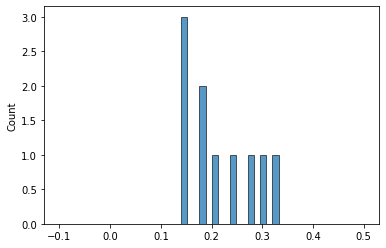

In [48]:
sns.histplot(all_sentiment1, bins=50, binrange=(-0.1,0.5))

<AxesSubplot:ylabel='Count'>

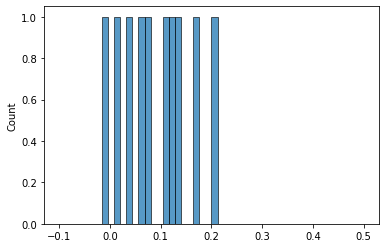

In [49]:
sns.histplot(all_sentiment2, bins=50, binrange=(-0.1,0.5))

<AxesSubplot:ylabel='Count'>

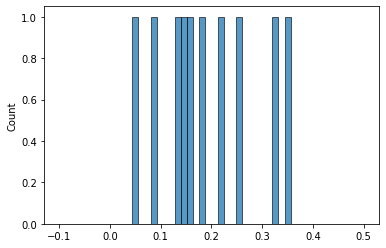

In [50]:
sns.histplot(all_sentiment3, bins=50, binrange=(-0.1,0.5))

<AxesSubplot:ylabel='Count'>

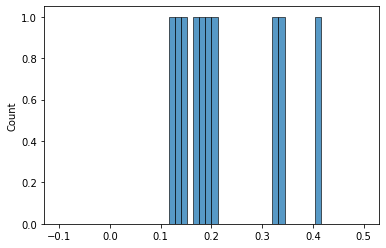

In [51]:
sns.histplot(all_sentiment4, bins=50, binrange=(-0.1,0.5))

<AxesSubplot:ylabel='Count'>

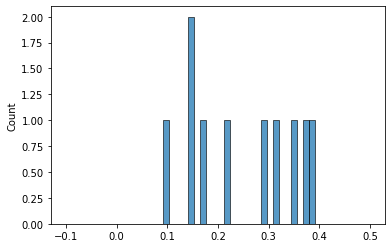

In [52]:
sns.histplot(all_sentiment5, bins=50, binrange=(-0.1,0.5))

## Collecting all the text data per modul for all the participants

In [53]:
data.head(10)

,User,Module,Step,Question,Answer,Answer_length
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",16
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",29
2,MP - Female 36 UK,Module_1,Step_2,In what ways would you like to be showing up d...,More relaxed,2
3,MP - Female 36 UK,Module_1,Step_2,Why is this important to you?,Just be confident in my skills and that I'll b...,20
4,MP - Female 36 UK,Module_1,Step_2,What’s one small action you can take right now...,"If worry creeps in, take a step back, thinking...",10
5,MP - Female 36 UK,Module_1,Step_2,How do you want to remember this?,Worrying is the thief of joy,6
6,MP - Female 36 UK,Module_1,Step_3,What was that experience like for you?,"I enjoyed it, I find I don't switch off muxh",10
7,MP - Female 36 UK,Module_1,Step_3,What are you noticing about conscious breathing?,Really helps to relax,4
8,MP - Female 36 UK,Module_1,Step_4,What has to be part of the way you live your l...,Freedom,1
9,MP - Female 36 UK,Module_1,Step_4,"Identify one of your top values, and let us kn...","Adaptability, I think it encompasses lots of t...",39


In [54]:
users_list_almost_all_q = ['MP - Female 36 UK', 'MD - Female 67 UK', 'DJ (30s) South Africa',
       'KA Female (40s) CAN', 'CD Female (30s) South Africa',
       'DE Male (30s) CAN', 'MS Female (60s) CAN', 'AV Female (40s) CAN',
       'SOD Male (38) UK', 'JS Male (30s) South Africa',
       'BM Male (30s) South Africa', 'RA Male (70s) CAN',
       'HA Female (70s) CAN', 'JA Male (50s) CAN',
       'DV Female (30s) South Africa', 'AG Female (40s) CAN',
       'JP Female (40s) CAN', 'SA Female (48) CAN', 'NG Male (67) UK']

In [55]:
users_list_all_q = ['DJ (30s) South Africa', 'CD Female (30s) South Africa',
       'AV Female (40s) CAN', 'SOD Male (38) UK', 'JS Male (30s) South Africa',
       'BM Male (30s) South Africa', 'RA Male (70s) CAN',
       'DV Female (30s) South Africa', 'AG Female (40s) CAN',
       'JP Female (40s) CAN']

# Exploring number of answered Qs for each participants

In [56]:
data.groupby(['Step','Question']).count()

User  Module  \
Step    Question                                                           
Step_1  What are you excited about as you begin your Le...    70      70   
Step_10 Notice the energy and emotion of that reaction....    29      29   
        We love attaching a metaphor, saying, action, m...    27      27   
        What are you noticing about the power of Consci...    29      29   
        What is a different way you could respond to th...    30      30   
...                                                          ...     ...   
Step_9  How do you want to bring this insight into your...    31      31   
        What is it like for you when you are living in ...    31      31   
        What is the impact this has on those around you?      31      31   
        What supports you with living in alignment to y...    31      31   
        What’s going to help you remember this?               31      31   

                                                            Answer  \
Step    Question                                                     
Step_1  What are you excited about as you begin your Le...      70   
Step_10 Notice the energy and emotion of that reaction....      29   
        We love attaching a metaphor, saying, action, m...      27   
        What are you noticing about the power of Consci...      29   
        What is a different way you could respond to th...      30   
...                                                            ...   
Step_9  How do you want to bring this insight into your...      31   
        What is it like for you when you are living in ...      31   
        What is the impact this has on those around you?        31   
        What supports you with living in alignment to y...      31   
        What’s going to help you remember this?                 31   

                                                            Answer_length  
Step    Question                                                           
Step_1  What are you excited about as you begin your Le...             70  
Step_10 Notice the energy and emotion of that reaction....             29  
        We love attaching a metaphor, saying, action, m...             27  
        What are you noticing about the power of Consci...             29  
        What is a different way you could respond to th...             30  
...                                                                   ...  
Step_9  How do you want to bring this insight into your...             31  
        What is it like for you when you are living in ...             31  
        What is the impact this has on those around you?               31  
        What supports you with living in alignment to y...             31  
        What’s going to help you remember this?                        31  

[70 rows x 4 columns]

In [57]:
temp = data[data.User == 'CD Female (30s) South Africa']
temp.groupby(['Step']).count()['Question']

Step
Step_1      2
Step_10     7
Step_11     4
Step_12     3
Step_13     8
Step_14     9
Step_2     10
Step_3      3
Step_4      7
Step_5     11
Step_6      1
Step_7      9
Step_8      1
Step_9      5
Name: Question, dtype: int64

In [58]:
data.groupby('User').count()['Answer']

User
AD Male (50s) CAN               54
AG Female (40s) CAN             73
AH Female (40s) CAN              6
AMH Male (40s) New Zealand      23
AV Female (40s) CAN             73
                                ..
TY Male (30s) CAN                1
WH Female (37) South Africa     30
WR Female (70s) CAN             36
ZS Female (30s) South Africa    26
ZT Female (40s) CAN              1
Name: Answer, Length: 70, dtype: int64

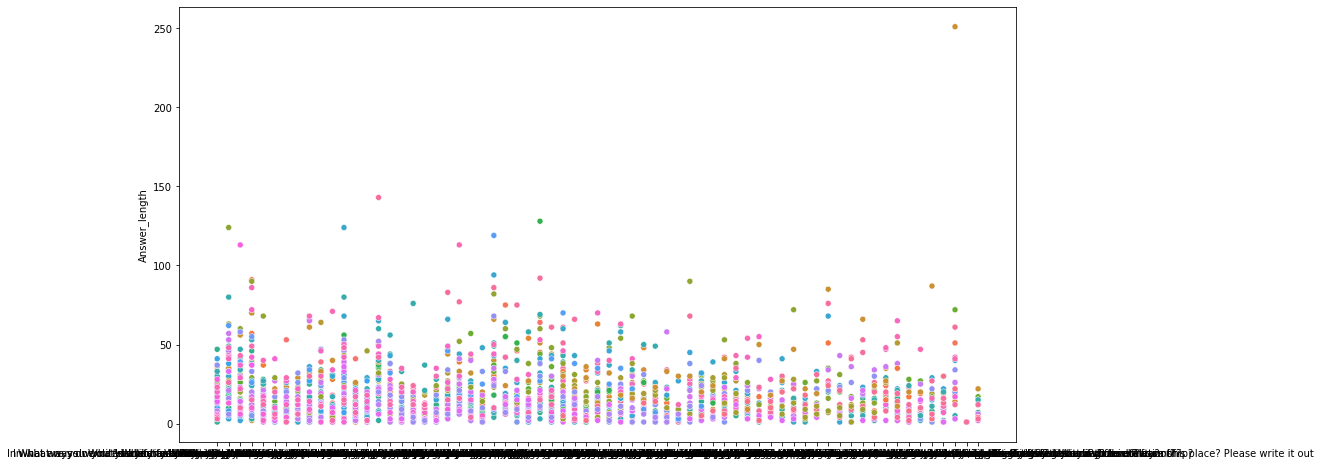

In [59]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Question', y='Answer_length', data=data, hue='User', legend=False)
ax.set(xlabel=None);

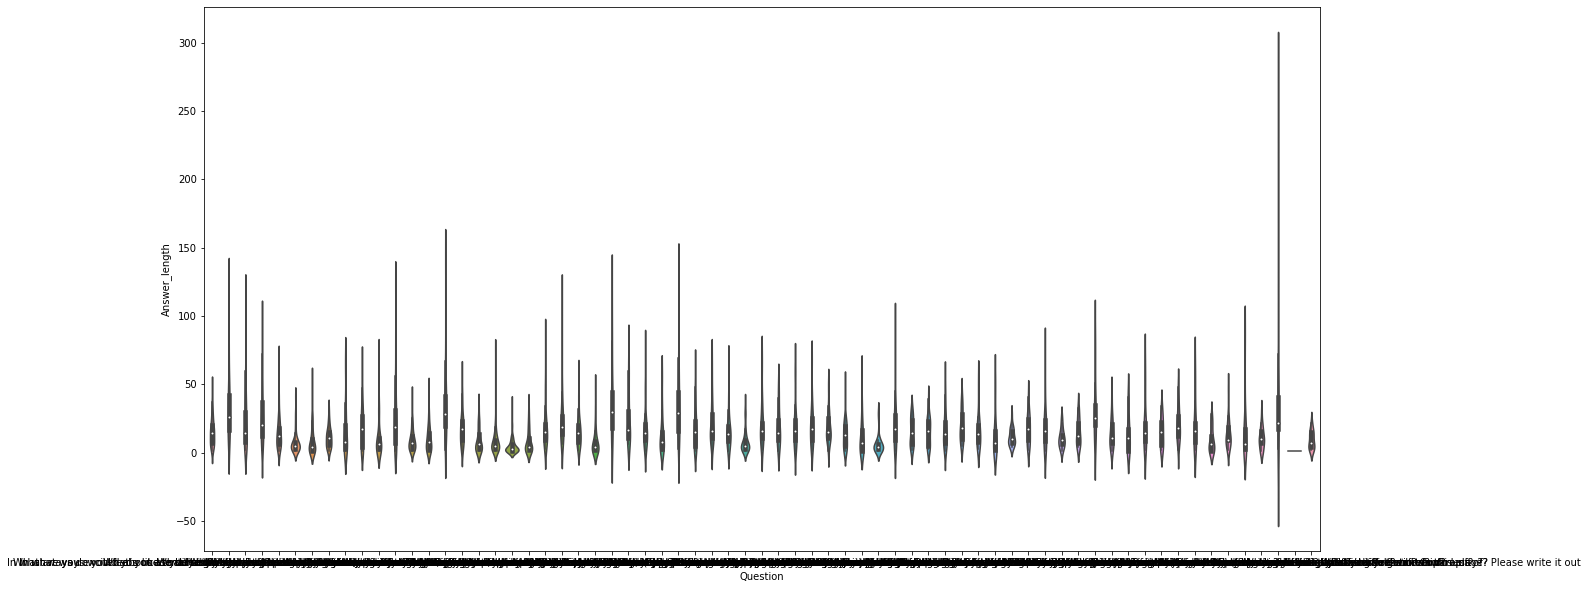

In [60]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='Question', y='Answer_length', data=data, legend=False); #hue='User', 

In [61]:
df_agg = data.groupby(['Question','User']).agg({'Answer_length':sum})
df_agg['Answer_length'].groupby('Question', group_keys=False).nlargest(50)

Question                                                   User                        
Based on these insights, how are you leading differently?  SA Female (48) CAN              65
                                                           NG Male (67) UK                 55
                                                           DE Male (30s) CAN               51
                                                           AG Female (40s) CAN             38
                                                           DJ (30s) South Africa           35
                                                                                           ..
Why is this important to you?                              KB - Female (30s) CAN           11
                                                           AD Male (50s) CAN               10
                                                           JP Female (40s) CAN              9
                                                           RB Fema

In [62]:
print(f'Max number of answers: {max(data.groupby("User").count()["Answer"])}')
print(f'Min number of answers: {min(data.groupby("User").count()["Answer"])}')

Max number of answers: 80
Min number of answers: 1


In [63]:
# participant | # of answered Qs | shortest answer | longest answer
participants = data['User'].unique()
answers_overview = []
for participant in participants:
    #print(participant)
    cur_user = participant
    cur_data = data[data['User']==cur_user]
    number_of_answers = cur_data.shape[0] - cur_data.Answer.isnull().sum()
    answers_list = []
    for i in range(len(cur_data.Answer)):
        #print(i)
        if type(list(cur_data.Answer)[i]) == str:
            answers_list.append(len(list(cur_data.Answer)[i].split(" ")))
        else: answers_list.append(0)
        
    max_answer = max(answers_list)
    min_answer = min(answers_list)
    answers_overview.append([cur_user, number_of_answers, max_answer, min_answer])
    
data_overview = pd.DataFrame(answers_overview, columns=["User", "Number_of_answers", "Longest_answer", "Shortest_answer"])
data_overview.head()

,User,Number_of_answers,Longest_answer,Shortest_answer
0,MP - Female 36 UK,68,42,1
1,KB - Female (30s) CAN,15,22,1
2,MW - Male (40s) New Zealand,36,91,1
3,MD - Female 67 UK,61,75,1
4,DJ (30s) South Africa,73,57,1


In [64]:
print(f'Max number of answers: {max(data_overview.Number_of_answers)}')
print(f'Min number of answers: {min(data_overview.Number_of_answers)}')

Max number of answers: 80
Min number of answers: 1


In [65]:
print(f'Longest answer has: {max(data_overview.Longest_answer)} words')
print(f'Shortest answer has: {min(data_overview.Shortest_answer)} words')

Longest answer has: 251 words
Shortest answer has: 1 words


In [66]:
data_overview[data_overview.Shortest_answer == 0]

,User,Number_of_answers,Longest_answer,Shortest_answer


In [67]:
group = data_overview.groupby('Number_of_answers')['User'].count()
group

Number_of_answers
1     7
2     2
3     1
6     5
8     2
15    3
21    1
23    2
24    1
25    1
26    6
27    1
30    1
35    1
36    5
37    1
45    1
46    1
47    1
49    1
50    1
53    1
54    1
58    2
59    1
61    8
64    1
68    1
73    9
80    1
Name: User, dtype: int64

In [68]:
data_overview[data_overview['Number_of_answers']==80]

,User,Number_of_answers,Longest_answer,Shortest_answer
9,CD Female (30s) South Africa,80,251,1


## Plotting distribution of answered questions

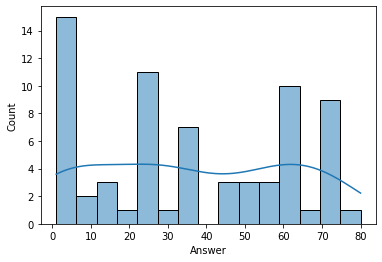

In [69]:
sns.histplot(data.groupby('User').count()['Answer'], bins=15, kde=True);

# Merging answers within a module

In [70]:
data.head(40)

,User,Module,Step,Question,Answer,Answer_length
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",16
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",29
2,MP - Female 36 UK,Module_1,Step_2,In what ways would you like to be showing up d...,More relaxed,2
3,MP - Female 36 UK,Module_1,Step_2,Why is this important to you?,Just be confident in my skills and that I'll b...,20
4,MP - Female 36 UK,Module_1,Step_2,What’s one small action you can take right now...,"If worry creeps in, take a step back, thinking...",10
5,MP - Female 36 UK,Module_1,Step_2,How do you want to remember this?,Worrying is the thief of joy,6
6,MP - Female 36 UK,Module_1,Step_3,What was that experience like for you?,"I enjoyed it, I find I don't switch off muxh",10
7,MP - Female 36 UK,Module_1,Step_3,What are you noticing about conscious breathing?,Really helps to relax,4
8,MP - Female 36 UK,Module_1,Step_4,What has to be part of the way you live your l...,Freedom,1
9,MP - Female 36 UK,Module_1,Step_4,"Identify one of your top values, and let us kn...","Adaptability, I think it encompasses lots of t...",39


In [71]:
print(data.Answer[0])
print(len(data.Answer[0]))
print(data.Answer[1])
print(len(data.Answer[1]))

Self development, learning new things about my way of being and how I interact with others
90
Sociable and confidently interact with others, will organise events and meet ups with friends and new colleagues. I am pretty self sufficient and lead myself through life and decisions
184


In [72]:
first_person_first_two = data.Answer[0] + " " + data.Answer[1]
first_person_first_two

'Self development, learning new things about my way of being and how I interact with others Sociable and confidently interact with others, will organise events and meet ups with friends and new colleagues. I am pretty self sufficient and lead myself through life and decisions'

In [73]:
len(first_person_first_two)

275

In [87]:
letssee = ' happy '
blob2 = TextBlob(letssee)
sentiment = blob2.sentiment
sentiment

Sentiment(polarity=0.8, subjectivity=1.0)

In [75]:
blob2.words

WordList(['this', 'food', 'was', 'really', 'boring'])